In [97]:
import pandas as pd              # Data handling  
import matplotlib.pyplot as plt  # Plotting graphaborn as sns            # Advanced visualization  
import pickle                    # Save/load model    
from sklearn.svm import SVC 
from sklearn.svm import SVR                     # SVM classifier    
# from sklearn.preprocessing import LabelEncoder    # Encode labels  
import warnings                                   # Handle warnings  
warnings.filterwarnings("ignore")  # Supp 
# Required Imports
from sklearn.model_selection import train_test_split # Split dataset 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation 


In [98]:
class Loader:
    """
    Loader class to load CSV data from a given filepath.

    Methods:
    --------
    load_data(filepath):
        Loads CSV data into a pandas DataFrame.

    Example:
    --------
    loader = Loader()
    df = loader.load_data("data.csv")
    """
    def load_data(self, filepath):
        """
        Load data from the given CSV file path.

        Parameters:
        filepath (str): Path to the CSV file.

        Returns:
        pd.DataFrame or None: Returns DataFrame if successful, else None.
        """
        try:
            data = pd.read_csv(filepath)
            print(" Data loaded successfully.")
            return data
        except FileNotFoundError:
            print(f" File not found: {filepath}")
            return None


class DataHandler:
    """
    A class for exploring a pandas DataFrame dynamically.

    Methods:
    --------
    explore_data(data, show_head, show_tail, show_columns, show_info, show_description)

    Example:
    --------
    handler = DataHandler()
    summary = handler.explore_data(data, show_head=True, show_info=True)
    """

    def explore_data(self, data, show_head=True, show_tail=True, show_columns=True,
                     show_info=True, show_description=True):
        """
        Explore various aspects of a pandas DataFrame based on flags.

        Parameters:
        data (pd.DataFrame): The loaded dataset.
        show_head (bool): If True, includes the first 5 rows.
        show_tail (bool): If True, includes the last 5 rows.
        show_columns (bool): If True, includes column names.
        show_info (bool): If True, prints info() summary.
        show_description (bool): If True, includes descriptive stats.

        Returns:
        dict: Dictionary containing selected summaries.
        """
        summary = {}

        
        if show_head:
            summary['head'] = data.head()

        
        if show_tail:
            summary['tail'] = data.tail()

        
        if show_columns:
            summary['columns'] = data.columns.tolist()

        
        if show_info:
            print("\n Data Info:")
            data.info()
            print()

        if show_description:
            summary['description'] = data.describe()

        return summary
    

In [99]:
class DataPreprocessor:
    """
    Class to perform basic data preprocessing tasks on a dataset.
    Includes methods for mean, mode, median, null detection, dropna, and fillna.
    """

    def __init__(self, data):
        """
        Initialize with a pandas DataFrame.

        Parameters:
        data (pd.DataFrame): Dataset to preprocess
        """
        self.data = data.copy()  # Use a copy to avoid modifying original data

    def get_columns(self):
        """
        Return all column names in the dataset.

        Returns:
        list: Column names
        """
        return self.data.columns.tolist()

    def get_mean(self):
        """
        Return mean of all numeric columns.

        Returns:
        pd.Series: Mean values
        """
        return self.data.mean(numeric_only=True)

    def get_mode(self):
        """
        Return mode of each column (first mode if multiple).

        Returns:
        pd.Series: Mode values
        """
        return self.data.mode().iloc[0]

    def get_median(self):
        """
        Return median of all numeric columns.

        Returns:
        pd.Series: Median values
        """
        return self.data.median(numeric_only=True)

    def find_nulls(self):
        """
        Find number of null values in each column.

        Returns:
        pd.Series: Null counts
        """
        return self.data.isnull().sum()

    def drop_nulls(self):
        """
        Drop rows with any null values.

        Returns:
        pd.DataFrame: Cleaned dataset
        """
        return self.data.dropna()

    def fill_nulls_with_mean(self):
        """
        Fill nulls with mean of each numeric column.

        Returns:
        pd.DataFrame: Dataset with filled nulls
        """
        return self.data.fillna(self.data.mean(numeric_only=True))


In [100]:
class DataVisualizer:
    """
    A flexible data visualization class to create various charts with customizable parameters.
    """

    def __init__(self, data):
        """
        Initialize the visualizer with a copy of the dataset.
        
        Parameters:
        data (pd.DataFrame): Dataset to visualize.
        """
        self.data = data.copy()

    def plot_histogram(self, column, title, xlabel="", ylabel="Frequency", color='skyblue', bins=30, width=8, height=6):
        """
        Plot a histogram for a numeric column.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the plot.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Color of the bars.
        bins (int): Number of bins in histogram.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='number').columns:
            plt.figure(figsize=(width, height))
            sns.histplot(self.data[column], kde=True, bins=bins, color=color)
            plt.title(title or f"Histogram of {column}")
            plt.xlabel(xlabel or column)
            plt.ylabel(ylabel)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a numeric column.")

    def plot_pie_chart(self, column, title="", width=6, height=6):
        """
        Plot a pie chart for a categorical column.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the chart.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='object').columns:
            plt.figure(figsize=(width, height))
            self.data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
            plt.title(title or f"Pie Chart of {column}")
            plt.ylabel("")
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a categorical column.")

    def plot_scatter(self, x_col, y_col, title, xlabel="", ylabel="", color='skyblue', width=8, height=6):
        """
        Plot a scatter plot between two numeric columns.

        Parameters:
        x_col (str): X-axis column.
        y_col (str): Y-axis column.
        title (str): Title of the chart.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Color of the points.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if x_col in self.data.select_dtypes(include='number').columns and y_col in self.data.select_dtypes(include='number').columns:
            plt.figure(figsize=(width, height))
            sns.scatterplot(data=self.data, x=x_col, y=y_col, color=color)
            plt.title(title or f"Scatter Plot: {x_col} vs {y_col}")
            plt.xlabel(xlabel or x_col)
            plt.ylabel(ylabel or y_col)
            plt.tight_layout()
            plt.show()
        else:
            print("Error: Both columns must be numeric.")

    def plot_bar_chart(self, column, title, xlabel="", ylabel="Count", color='skyblue', width=8, height=6):
        """
        Plot a bar chart for a categorical column.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the chart.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Color of bars.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='object').columns:
            plt.figure(figsize=(width, height))
            sns.countplot(x=column, data=self.data, color=color)
            plt.title(title or f"Bar Chart of {column}")
            plt.xlabel(xlabel or column)
            plt.ylabel(ylabel)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a categorical column.")

    def plot_line_chart(self, column, title, xlabel="Index", ylabel="", color='skyblue', width=8, height=6):
        """
        Plot a line chart for a numeric column over index.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the chart.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Line color.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='number').columns:
            plt.figure(figsize=(width, height))
            plt.plot(self.data.index, self.data[column], color=color, marker='o')
            plt.title(title or f"Line Chart of {column}")
            plt.xlabel(xlabel)
            plt.ylabel(ylabel or column)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a numeric column.")

In [101]:
class BivariateVisualizer:
    """
    Class for generating bivariate visualizations between two variables at a time:
    - Scatter Plot
    - Line Plot
    - Bar Plot
    - Box Plot
    - Correlation Heatmap
    """

    def __init__(self, data):
        """
        Initialize the visualizer with dataset.
        
        Parameters:
        data (pd.DataFrame): The input dataset.
        """
        self.data = data.copy()

    def plot_scatter(self, x_col, y_col, title, xlabel='', ylabel='', color='green', width=8, height=6):
        """
        Plot a single scatter plot between two numeric variables.
        """
        plt.figure(figsize=(width, height))
        sns.scatterplot(x=self.data[x_col], y=self.data[y_col], color=color)
        plt.title(title or f"Scatter Plot: {x_col} vs {y_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.tight_layout()
        plt.show()

    def plot_line(self, x_col, y_col, title, xlabel='', ylabel='', color='blue', width=8, height=6):
        """
        Plot a single line plot between two variables.
        """
        plt.figure(figsize=(width, height))
        plt.plot(self.data[x_col], self.data[y_col], color=color, marker='o')
        plt.title(title or f"Line Plot: {x_col} vs {y_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.tight_layout()
        plt.show()

    def plot_bar(self, x_col, y_col, title, xlabel='', ylabel='', color='orange', width=8, height=6):
        """
        Plot a single bar chart showing a numeric value across categories.
        """
        plt.figure(figsize=(width, height))
        sns.barplot(x=x_col, y=y_col, data=self.data, color=color)
        plt.title(title or f"Bar Plot: {y_col} by {x_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_box(self, x_col, y_col, title, xlabel='', ylabel='', palette='Set2', width=8, height=6):
        """
        Plot a single box plot showing distribution of a numeric column grouped by a category.
        """
        plt.figure(figsize=(width, height))
        sns.boxplot(x=x_col, y=y_col, data=self.data, palette=palette)
        plt.title(title or f"Box Plot: {y_col} by {x_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_heatmap(self, title="Correlation Heatmap", cmap='coolwarm', width=10, height=8):
        """
        Plot a heatmap showing correlation between all numeric variables.
        """
        numeric_data = self.data.select_dtypes(include='number')
        corr = numeric_data.corr()

        plt.figure(figsize=(width, height))
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title(title)
        plt.tight_layout()
        plt.show()

In [102]:
class UnivariateVisualizer:
    """
    Class for univariate visualizations.
    Supports:
    - Histogram (numeric)
    - Pie Chart (categorical)
    - Bar Chart (categorical)
    - Line Chart (numeric)
    """

    def __init__(self, data):
        """
        Initialize with a copy of the dataset.
        
        Parameters:
        data (pd.DataFrame): Input dataset.
        """
        self.data = data.copy()

    def plot_histogram(self, column, title="", xlabel="", ylabel="Frequency", bins=30, kde=True, color='skyblue', width=8, height=6):
        """
        Plot histogram for a single numeric column.
        """
        plt.figure(figsize=(width, height))
        sns.histplot(self.data[column], bins=bins, kde=kde, color=color)
        plt.title(title or f"Histogram of {column}")
        plt.xlabel(xlabel or column)
        plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()

    def plot_pie_chart(self, column, title="", colors=None, width=6, height=6):
        """
        Plot pie chart for a single categorical column.
        """
        plt.figure(figsize=(width, height))
        self.data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
        plt.title(title or f"Pie Chart of {column}")
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

    def plot_bar_chart(self, column, title="", xlabel="", ylabel="Count", color='lightgreen', width=8, height=6):
        """
        Plot bar chart (countplot) for a single categorical column.
        """
        plt.figure(figsize=(width, height))
        sns.countplot(x=column, data=self.data, color=color)
        plt.title(title or f"Bar Chart of {column}")
        plt.xlabel(xlabel or column)
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_line_chart(self, column, title="", xlabel="Index", ylabel="", color='purple', width=8, height=6):
        """
        Plot line chart for a single numeric column.
        """
        plt.figure(figsize=(width, height))
        plt.plot(self.data.index, self.data[column], color=color, marker='o')
        plt.title(title or f"Line Chart of {column}")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel or column)
        plt.tight_layout()
        plt.show()



In [103]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class Model:
    def __init__(self, df, target_column):
        self.df = df.copy()
        self.target_column = target_column
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = None
        self.X_train_scaled = None
        self.X_test_scaled = None

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[self.target_column])
        X = X.select_dtypes(include='number')
        y = self.df[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        return self.X_train, self.X_test, self.y_train, self.y_test

    def needs_scaling(self, threshold=0.1):
        if self.X_train is None:
            raise ValueError("Split the data before checking for scaling.")
        feature_ranges = self.X_train.max() - self.X_train.min()
        needs_scale = any(feature_ranges > threshold)
        return needs_scale

    def scale_data(self, method='standard'):
        if self.X_train is None:
            raise ValueError("Split the data before scaling.")
        if method == 'standard':
            self.scaler = StandardScaler()
        elif method == 'minmax':
            self.scaler = MinMaxScaler()
        else:
            raise ValueError("Scaling method must be 'standard' or 'minmax'")
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        return self.X_train_scaled, self.X_test_scaled

    def train_model(self, model=None):
        if model is None:
            model = SVC(kernel='linear')
        if self.X_train_scaled is not None:
            self.model = model.fit(self.X_train_scaled, self.y_train)
        else:
            self.model = model.fit(self.X_train, self.y_train)
        return self.model

    def predict(self, X=None):
        if self.model is None:
            raise Exception("Model not trained. Please train before predicting.")
        if X is None:
            X = self.X_test_scaled if self.X_test_scaled is not None else self.X_test
        else:
            if self.scaler is not None:
                X = self.scaler.transform(X)
        return self.model.predict(X)

    def evaluate(self):
        y_pred = self.predict()
        accuracy = accuracy_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        class_report = classification_report(self.y_test, y_pred)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)
        return accuracy, conf_matrix, class_report




In [104]:
loader = Loader()
data = loader.load_data("StressLevelDataset.csv")

if data is not None:
    handler = DataHandler()
    summary = handler.explore_data(
        data,
        show_head=True,
        show_tail=False,
        show_columns=True,
        show_info=True,
        show_description=True
    )

 Data loaded successfully.

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int6

In [105]:
print("First 5 Rows:", summary["head"])

First 5 Rows:    anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...       

In [106]:
print("Columns:", summary["columns"])

Columns: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


In [107]:
print("Description:", summary["description"])

Description:        anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       

In [108]:
preprocessor = DataPreprocessor(data)

print("Column Names:", preprocessor.get_columns())

Column Names: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


In [109]:
print("Mean Values:", preprocessor.get_mean())

Mean Values: anxiety_level                   11.063636
self_esteem                     17.777273
mental_health_history            0.492727
depression                      12.555455
headache                         2.508182
blood_pressure                   2.181818
sleep_quality                    2.660000
breathing_problem                2.753636
noise_level                      2.649091
living_conditions                2.518182
safety                           2.737273
basic_needs                      2.772727
academic_performance             2.772727
study_load                       2.621818
teacher_student_relationship     2.648182
future_career_concerns           2.649091
social_support                   1.881818
peer_pressure                    2.734545
extracurricular_activities       2.767273
bullying                         2.617273
stress_level                     0.996364
dtype: float64


In [110]:
print("Median Values:", preprocessor.get_median())

Median Values: anxiety_level                   11.0
self_esteem                     19.0
mental_health_history            0.0
depression                      12.0
headache                         3.0
blood_pressure                   2.0
sleep_quality                    2.5
breathing_problem                3.0
noise_level                      3.0
living_conditions                2.0
safety                           2.0
basic_needs                      3.0
academic_performance             2.0
study_load                       2.0
teacher_student_relationship     2.0
future_career_concerns           2.0
social_support                   2.0
peer_pressure                    2.0
extracurricular_activities       2.5
bullying                         3.0
stress_level                     1.0
dtype: float64


In [111]:
print("Null Values:", preprocessor.find_nulls())

Null Values: anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [112]:
import matplotlib.pyplot as plt

class Visualizer:
    def __init__(self, data):
        self.data = data

    def plot_histogram(self, column, title="Histogram"):
        self.data[column].hist()
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    def plot_bar_chart(self, column, title="Bar Chart"):
        self.data[column].value_counts().plot(kind="bar")
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()


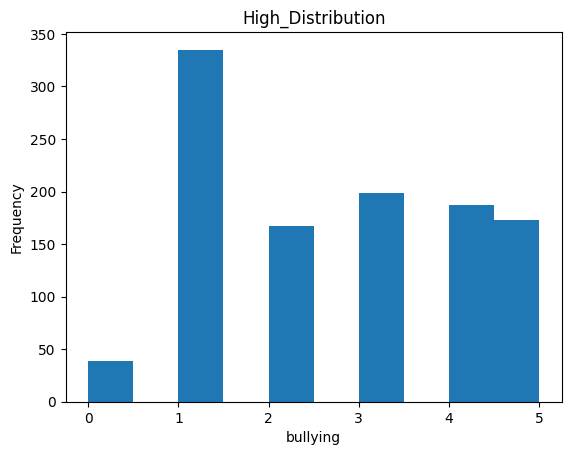

In [114]:
import matplotlib.pyplot as plt

data["bullying"].plot(kind="hist")
plt.title("High_Distribution")
plt.xlabel("bullying")
plt.show()


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

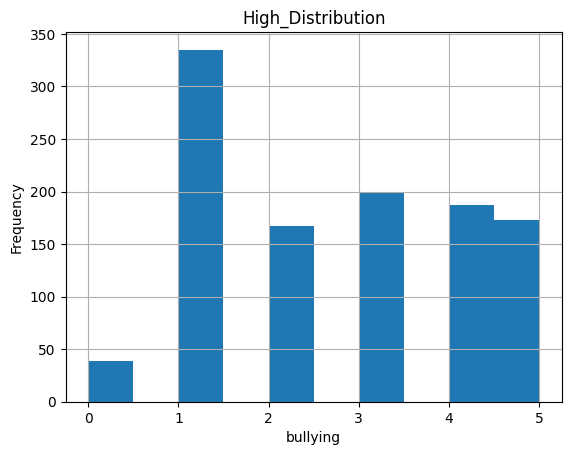

In [115]:
visualizer = Visualizer(data)
visualizer.plot_histogram("bullying", title="High_Distribution")


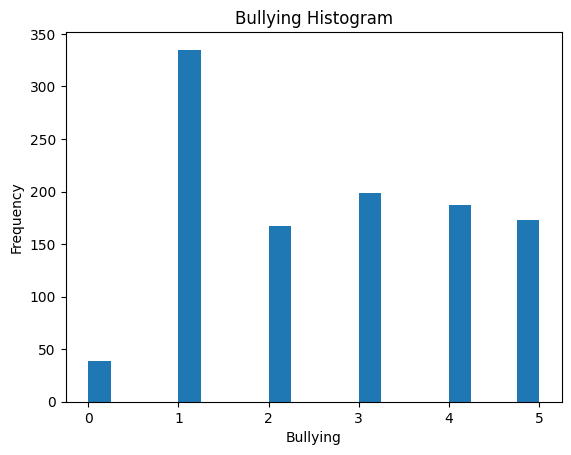

In [119]:
data["bullying"].plot(kind="hist", bins=20, title="Bullying Histogram")
plt.xlabel("Bullying")
plt.ylabel("Frequency")
plt.show()


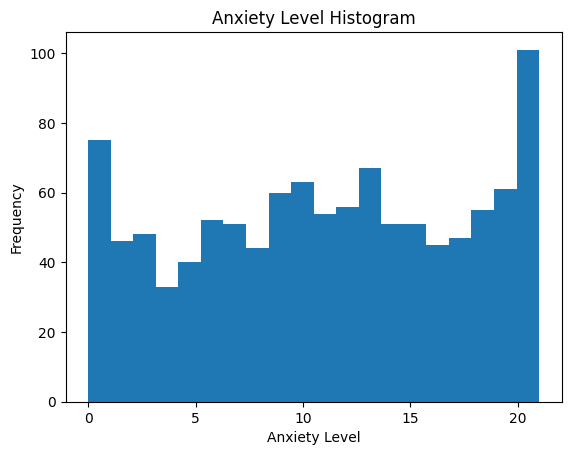

In [121]:
data["anxiety_level"].plot(kind="hist", bins=20, title="Anxiety Level Histogram")
plt.xlabel("Anxiety Level")
plt.ylabel("Frequency")
plt.show()


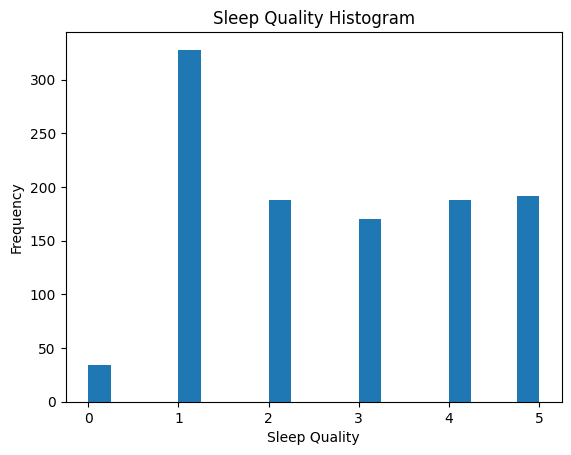

In [122]:
data["sleep_quality"].plot(kind="hist", bins=20, title="Sleep Quality Histogram")
plt.xlabel("Sleep Quality")
plt.ylabel("Frequency")
plt.show()


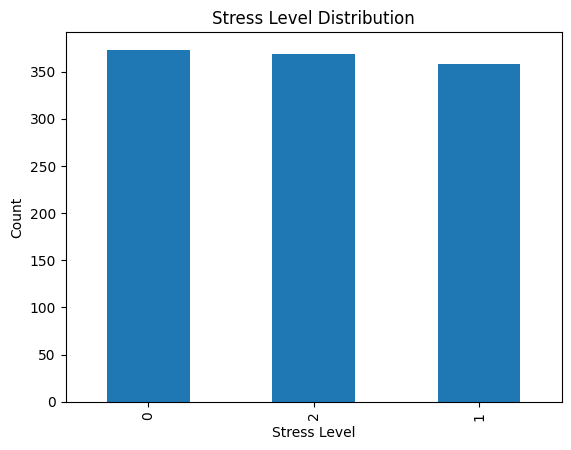

In [123]:
data["stress_level"].value_counts().plot(kind="bar", title="Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()


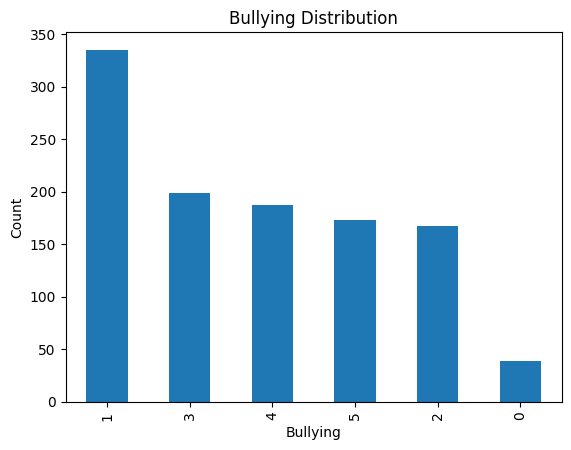

In [124]:
data["bullying"].value_counts().plot(kind="bar", title="Bullying Distribution")
plt.xlabel("Bullying")
plt.ylabel("Count")
plt.show()


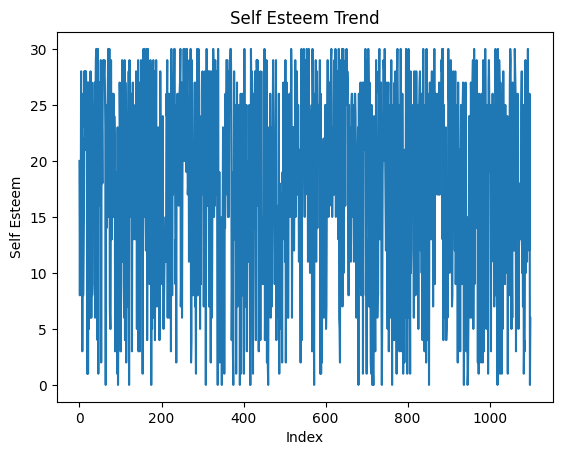

In [127]:
data["self_esteem"].plot(kind="line", title="Self Esteem Trend")
plt.xlabel("Index")
plt.ylabel("Self Esteem")
plt.show()


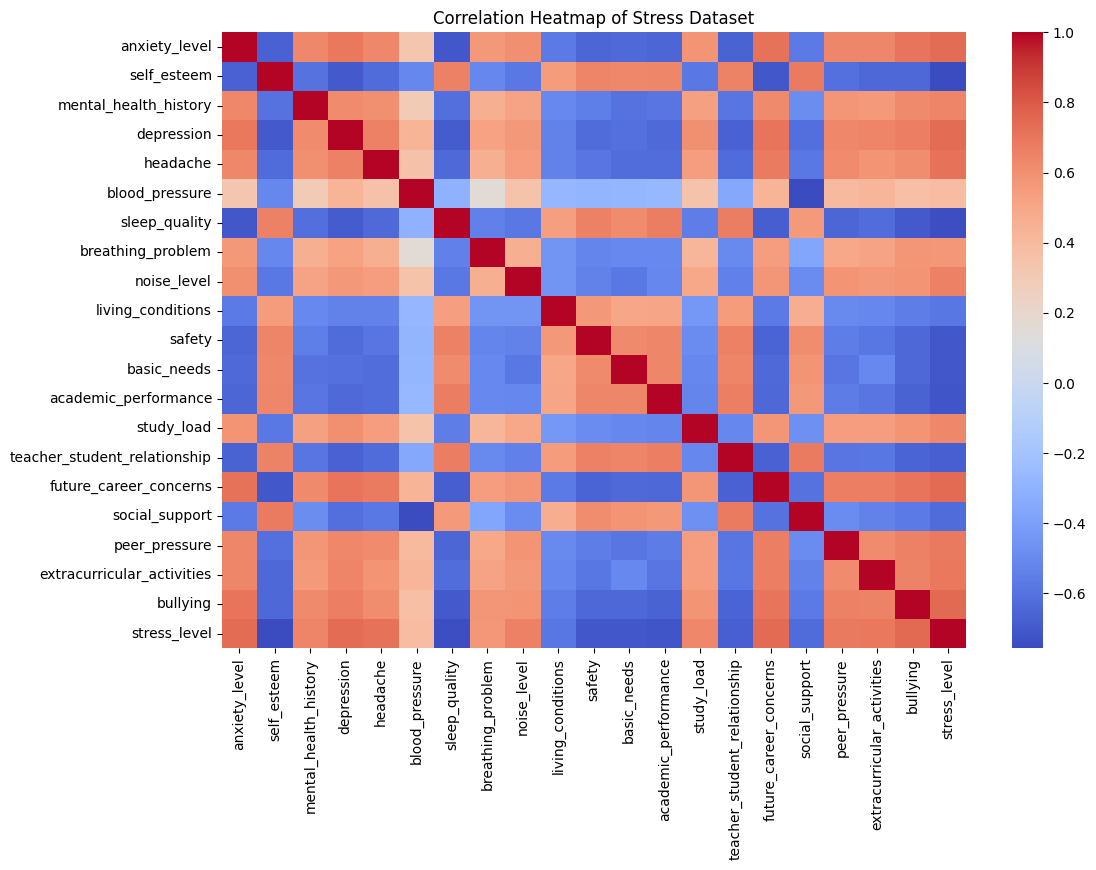

In [129]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Stress Dataset")
plt.show()


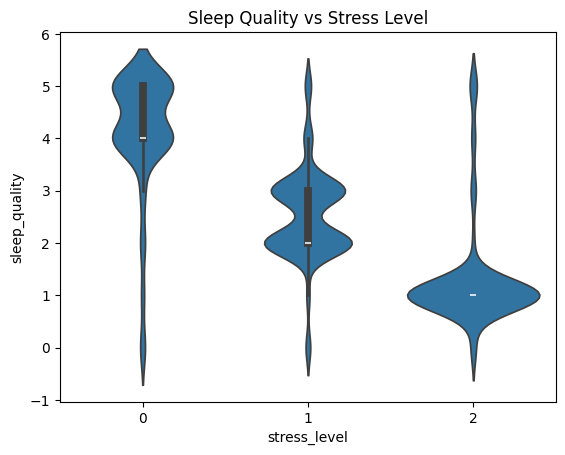

In [130]:
sns.violinplot(x="stress_level", y="sleep_quality", data=data)
plt.title("Sleep Quality vs Stress Level")
plt.show()


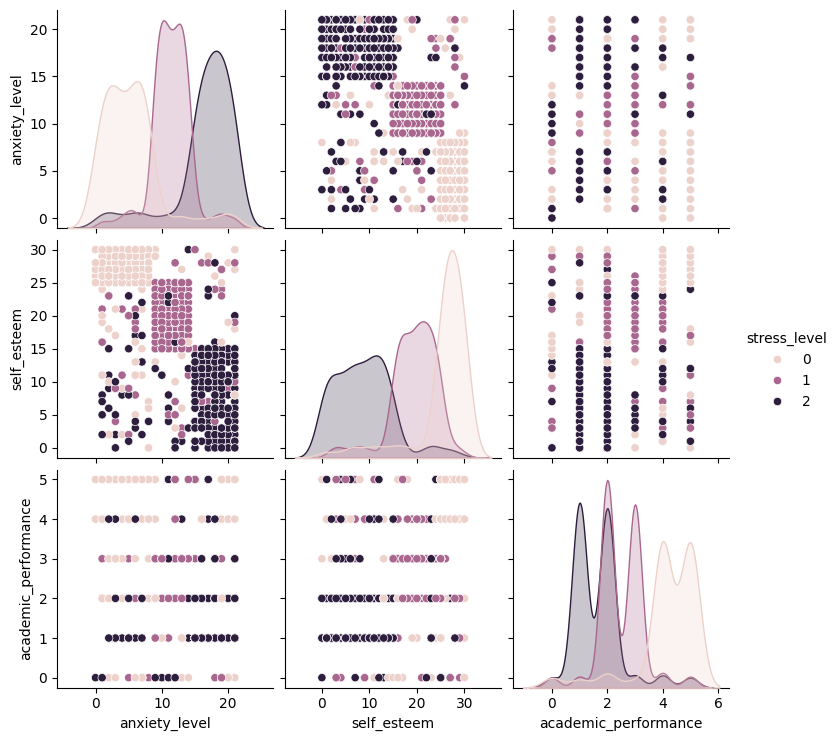

In [131]:
import seaborn as sns
sns.pairplot(data[["anxiety_level", "self_esteem", "academic_performance", "stress_level"]], hue="stress_level")
plt.show()


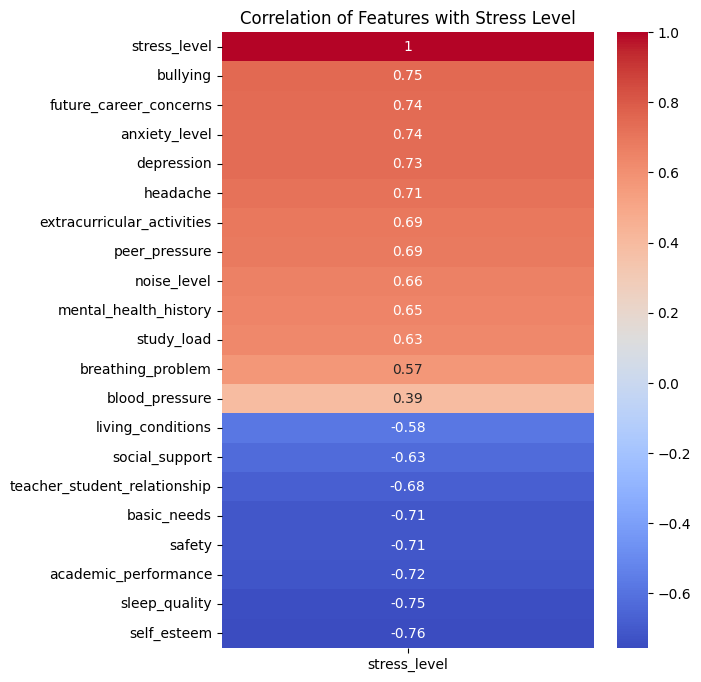

In [132]:
corr = data.corr(numeric_only=True)["stress_level"].sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.heatmap(corr.to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Stress Level")
plt.show()


In [135]:
# Step 1: Keep only relevant columns (example selection)
data = data[['anxiety_level', 'self_esteem', 'sleep_quality', 'bullying', 'stress_level']]

# Step 2: Drop rows with any missing values
data.dropna(inplace=True)

# Step 3: Ensure target column is numeric (important!)
data['stress_level'] = pd.to_numeric(data['stress_level'], errors='coerce')

# Step 4: Drop again if 'stress_level' became NaN after conversion
data.dropna(subset=['stress_level'], inplace=True)

# Step 5: Reset index
data.reset_index(drop=True, inplace=True)



In [137]:
import pickle

# ---- Step 0: Select relevant columns from your stress dataset ----
# (Change this list if aap aur features bhi include karna chahte ho)
data = data[['anxiety_level', 'self_esteem', 'sleep_quality', 'bullying', 'stress_level']].copy()

# ---- Step 1: Initialize model object (target is 'stress_level') ----
model_obj = Model(data, target_column='stress_level')

# ---- Step 2: Prepare, scale, train, evaluate ----
# (optionally pass test_size/random_state if your Model supports it)
model_obj.split_data(test_size=0.2, random_state=42)
model_obj.scale_data(method='standard')   # 'standard' ya 'minmax' depending on your implementation
model_obj.train_model()                    # <-- correct method call
model_obj.evaluate()

# ---- Step 3: Save trained model and scaler to disk ----
with open("svm_model.pkl", "wb") as model_file:
    pickle.dump(model_obj.model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(model_obj.scaler, scaler_file)

print("Model and scaler saved successfully.")




Accuracy: 90.91%
Confusion Matrix:
[[69  4  3]
 [ 2 67  4]
 [ 2  5 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.88      0.92      0.90        73
           2       0.90      0.90      0.90        71

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220

Model and scaler saved successfully.


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(self):
    y_pred = self.predict()
    mse = mean_squared_error(self.y_test, y_pred)
    mae = mean_absolute_error(self.y_test, y_pred)
    r2 = r2_score(self.y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R² Score:", r2)